# Computing Bootcamp II -- Data Processing (Data in Tabular formats)
Ivan Higuera-Mendieta - ivanhigueram@uchicago.edu

Welcome to day n of Coding for research. In the past days we have discussed several topics: 

1. Advanced `numpy` tricks that include masking and vectorized operations. 

2. Some introduction to the basics of `pandas` and tabular data. 

Today we will focus on `pandas` and its multiple tricks to read and run operation in tabular formats. If you are an `R` user, you will be familiarized with a lot of this terms, and probably you will find yourself flying through this session. `pandas` is a flexible package that -as all thing in programing- allow us to make many operations and [tidy-up](https://www.jstatsoft.org/article/view/v059i10) our data. 

What tidy data means? 

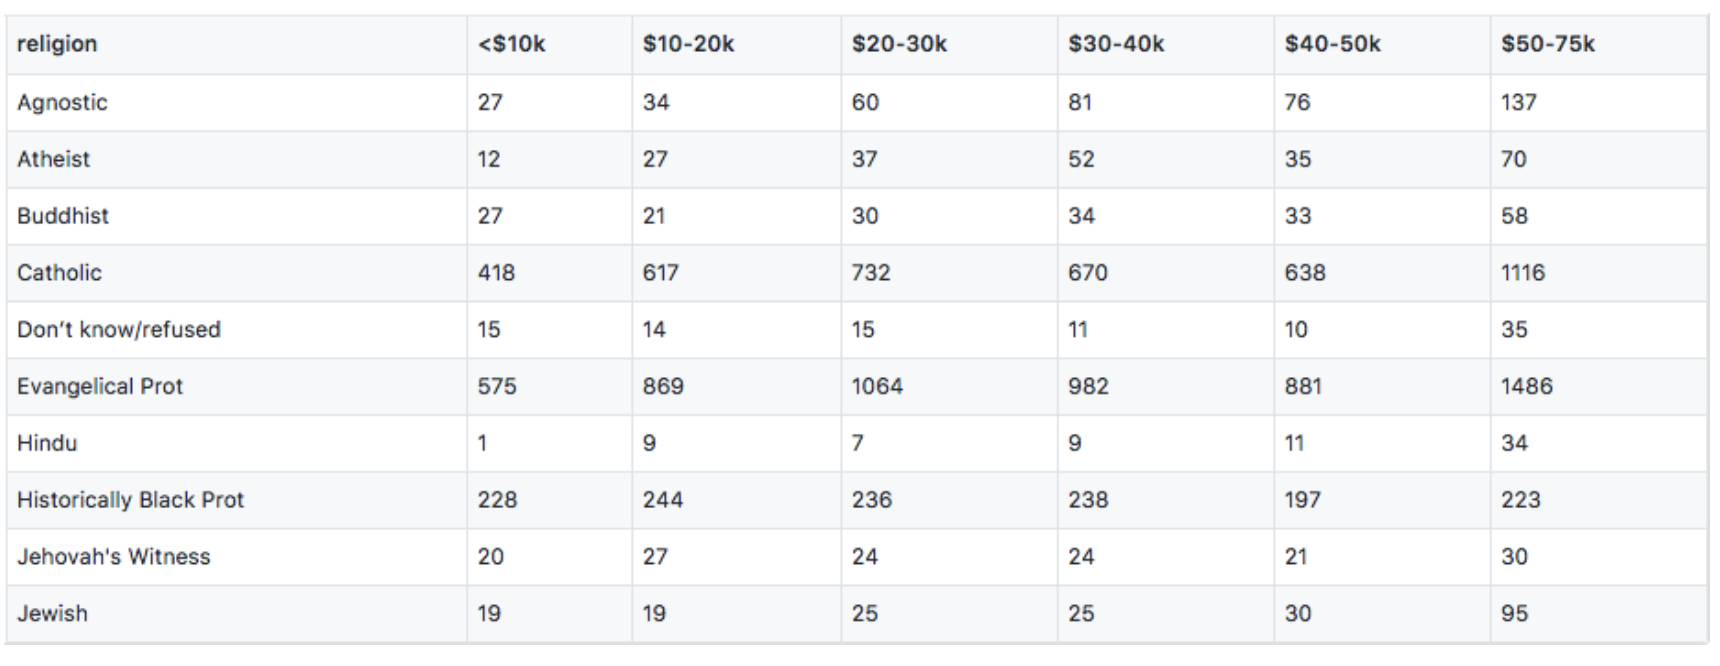



Using Hadley Wickham definition, the goal of clean data is to have observations in rows, and characteristics of the observations (variables) in columns. For instance, in the image above we have different religions and levels of income as columns. Here, we have several observation contained into one row, which might be confusing, how does the data looks when is *tidy*? 




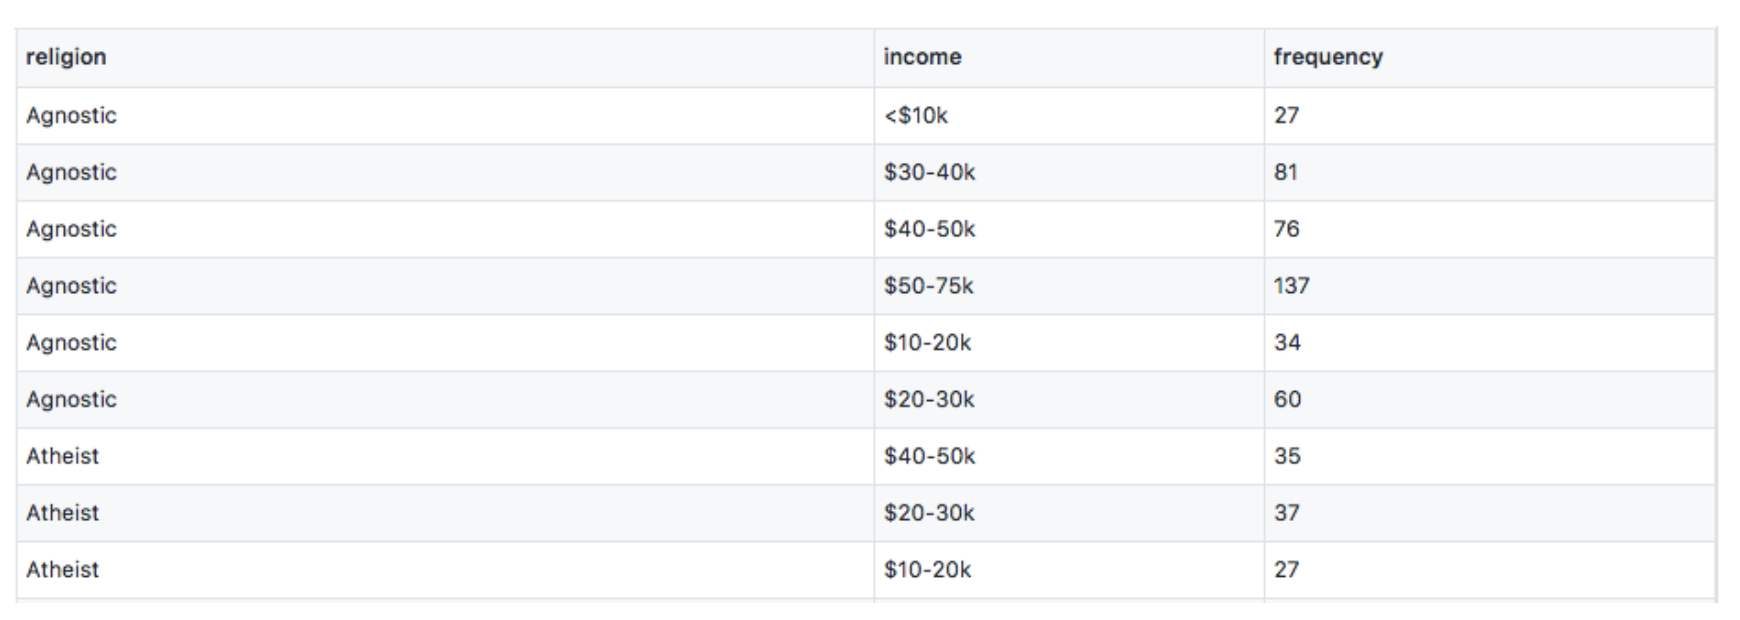

In the image above we can see that our DataFrame contains several rows per combination of religion and income. This abide by our rule that one row per distinct observation. This does not only allow us to filter the data faster, but also, allow us to make faster operations. Although, *tidy* data is not always the solution to our problems. 

In this session we will learn some `pandas`: 
 1. Data structures: `pd.Series`, `pd.Index`, `pd.DataFrames`
 2. Data wrangling: filtering and cleaning
 3. *split-apply-combine*
 4. Visualization using pandas

 Let us load the libraries we will use for this session. 

In [1]:
import os
import requests
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt         

# We wont be using this much today, but as in the last sessions: 
#homedir = '/content/drive/Shared drives/GEOS39650/Bootcamps 2020/Coding_2_planning/data/'
#os.chdir(homedir)
#print(os.getcwd())

## Section 1. Data structures in `pandas`

We have several data structure in `pandas`. As you will see, some of this structures are similar to `numpy` arrays. In essence, they are indexed arrays with similar functionality as our good old `ndarrays`.



### 1.1. Series

Let's explore `pd.Series` and how to slice it:

In [2]:
temp = pd.Series([40.0, 41.0, 39.0, 39.0, 19.0, 15.0, 11.0], name='Temperature')
temp

0    40.0
1    41.0
2    39.0
3    39.0
4    19.0
5    15.0
6    11.0
Name: Temperature, dtype: float64

In [ ]:
temp.index

RangeIndex(start=0, stop=7, step=1)

In [3]:
temp = pd.Series([40.0, 41.0, 39.0, 39.0, 19.0, 15.0, 11.0], 
                 index=['a', 'b', 'c', 'd', 'e', 'f', 'g'],
                 name='Temperature')
temp

a    40.0
b    41.0
c    39.0
d    39.0
e    19.0
f    15.0
g    11.0
Name: Temperature, dtype: float64

In [4]:
temp['a':'c']

a    40.0
b    41.0
c    39.0
Name: Temperature, dtype: float64

We can use our `index` property to slice our `pd.Series` and filter data. The `index` object will be ubiquous within `pandas` and has important properties and functions to make our life easier. Indices can be complex, include more than one attribute and data type. For instance:

In [5]:
temp = pd.Series([40.0, 41.0, 39.0, 39.0, 19.0, 15.0, 11.0], 
                 index=pd.date_range('2020-01-01', '2020-01-07', freq='D'),
                 name='Temperature')
temp

2020-01-01    40.0
2020-01-02    41.0
2020-01-03    39.0
2020-01-04    39.0
2020-01-05    19.0
2020-01-06    15.0
2020-01-07    11.0
Freq: D, Name: Temperature, dtype: float64

In [6]:
# .loc is an accesor that allow us to use the index of any pandas object. Is useful to avoid confusions. 
temp.loc['2020-01-01':'2020-01-04']

2020-01-01    40.0
2020-01-02    41.0
2020-01-03    39.0
2020-01-04    39.0
Freq: D, Name: Temperature, dtype: float64

In [7]:
temp[(temp < 20)]

2020-01-05    19.0
2020-01-06    15.0
2020-01-07    11.0
Freq: D, Name: Temperature, dtype: float64

In [8]:
avg_temp = temp.mean()
print(f'The average temperature in Chicago is: {avg_temp}')

The average temperature in Chicago is: 29.142857142857142


#### Check-in [# 1]

We have covered how to play with `pd.Series`, now calculate the year temperature mean using the data below 

_The data is a random generated array using a normal distribution. Numpy rocks._

In [12]:
"""
Use this data and use this block to code your answer
"""

temp_tropical = np.random.default_rng().normal(20, 5, 366)
day_objs = pd.date_range('2020-01-01', '2020-12-31', freq='D')

pd.Series(temp_tropical, index=day_objs).mean()

20.2192288087084

We can see that `pd.Series` are generalized one dimensional numpy arrays that also have some `dict` features (index work as keys). Now, let's jump to `DataFrames`. 

### 1.2 DataFrames

`DataFrames` are a collection of `Series`:  

In [14]:
temperature = pd.Series({'2020-01-01': 40.0,
                         '2020-01-02': 41.0,
                         '2020-01-03': 39.0,
                         '2020-01-04': 39.0,
                         '2020-01-05': 19.0,
                         '2020-01-06': 15.0,
                         '2020-01-07': 11.0})

rainfall = pd.Series({'2020-01-01': 2.0, 
                      '2020-01-02': 0.0, 
                      '2020-01-03': 0.1, 
                      '2020-01-04': 0.0, 
                      '2020-01-05': 0.4, 
                      '2020-01-06': 0.7, 
                      '2020-01-07': 0.8})

df = pd.DataFrame({
    'temp': temperature,
    'rainfall': rainfall
})
df

,temp,rainfall
2020-01-01,40.0,2.0
2020-01-02,41.0,0.0
2020-01-03,39.0,0.1
2020-01-04,39.0,0.0
2020-01-05,19.0,0.4
2020-01-06,15.0,0.7
2020-01-07,11.0,0.8


In [15]:
df['temp']

2020-01-01    40.0
2020-01-02    41.0
2020-01-03    39.0
2020-01-04    39.0
2020-01-05    19.0
2020-01-06    15.0
2020-01-07    11.0
Name: temp, dtype: float64

In [16]:
df.temp.mean()

29.142857142857142

As you can see in the above cells, you can select columns by either slicing using the column name: `df[<column name>]`, or by using the column name as a key (just as a `dict`!): `df.<column name>`. But **BEWARE**, if column is called `mean`, `pop`, or any other `pandas` method, you might have conflicts. 

In [17]:
df['anomaly'] = df['temp'] - df.temp.mean()
df

,temp,rainfall,anomaly
2020-01-01,40.0,2.0,10.857143
2020-01-02,41.0,0.0,11.857143
2020-01-03,39.0,0.1,9.857143
2020-01-04,39.0,0.0,9.857143
2020-01-05,19.0,0.4,-10.142857
2020-01-06,15.0,0.7,-14.142857
2020-01-07,11.0,0.8,-18.142857


Creating new columns is easy peacy! 

Let us remember that a `pd.DataFrame` is not very different that a multidimensional `np.array`:

In [18]:
df.values

array([[ 40.        ,   2.        ,  10.85714286],
       [ 41.        ,   0.        ,  11.85714286],
       [ 39.        ,   0.1       ,   9.85714286],
       [ 39.        ,   0.        ,   9.85714286],
       [ 19.        ,   0.4       , -10.14285714],
       [ 15.        ,   0.7       , -14.14285714],
       [ 11.        ,   0.8       , -18.14285714]])

In [19]:
df.values.T

array([[ 40.        ,  41.        ,  39.        ,  39.        ,
         19.        ,  15.        ,  11.        ],
       [  2.        ,   0.        ,   0.1       ,   0.        ,
          0.4       ,   0.7       ,   0.8       ],
       [ 10.85714286,  11.85714286,   9.85714286,   9.85714286,
        -10.14285714, -14.14285714, -18.14285714]])

#### Check in [# 2]

We have learn how to slice data in our manually created `DataFrame` (`df`). Now, calculate rainfall anomaly and return the dates where the anomaly is negative. 

In [20]:
"""
Your code for the challenge should go here!
"""

df['anomaly_rainfall'] = df['rainfall'] - df['rainfall'].mean()
df


,temp,rainfall,anomaly,anomaly_rainfall
2020-01-01,40.0,2.0,10.857143,1.428571
2020-01-02,41.0,0.0,11.857143,-0.571429
2020-01-03,39.0,0.1,9.857143,-0.471429
2020-01-04,39.0,0.0,9.857143,-0.571429
2020-01-05,19.0,0.4,-10.142857,-0.171429
2020-01-06,15.0,0.7,-14.142857,0.128571
2020-01-07,11.0,0.8,-18.142857,0.228571


As we did above with the `pd.Series`, the same methods works for `pd.DataFrames`. You can use `loc` to use the index (both index of columns and rows). For clarity, let us see that: 
  - Index: row names
  - Columns: column names (index of columns!)


In [21]:
df.loc['2020-01-01':'2020-01-03', 'anomaly']

2020-01-01    10.857143
2020-01-02    11.857143
2020-01-03     9.857143
Name: anomaly, dtype: float64

Another option is to use Python indices (naive indices?)

In [22]:
df.iloc[0:5, 1]

2020-01-01    2.0
2020-01-02    0.0
2020-01-03    0.1
2020-01-04    0.0
2020-01-05    0.4
Name: rainfall, dtype: float64

~Or we can even combine both!~ Not anymore. `ix` was deprecated.

You can also use logic indexing, just as a fast way to filter our data

In [23]:
df[df.anomaly > 0]

,temp,rainfall,anomaly,anomaly_rainfall
2020-01-01,40.0,2.0,10.857143,1.428571
2020-01-02,41.0,0.0,11.857143,-0.571429
2020-01-03,39.0,0.1,9.857143,-0.471429
2020-01-04,39.0,0.0,9.857143,-0.571429


## Section 2. Data wrangling: An example on how to open data using `pandas`
Let's jump now to how to read and write data from `pandas`. Pandas is extremely flexible and can read a vast array of data formats, including challenging text formats, and even hierarchical formats as `json`. The most widely format for tabular data is CSV (comma-separated-values) or any sort of text files with specific separators (can be a `tab`, or basically anything). 

We saw in out last session an example of reading a CSV file from disk. But we can also read CSV files from any place on the internet, or even compressed files. `pandas` will handle everything for us. 

For this purpose we will use the [NOAA Integration Surface Database](https://www.ncdc.noaa.gov/isd). This data source contain more than 35,000 weather stations around the world. Data is storaged in a FTP server (but also a HTML server) and files are stored by year and station. 

Before jumping into data, let's explore the stations available to us by checking the [station metadata](https://www1.ncdc.noaa.gov/pub/data/noaa/isd-history.txt).


Wow, this file is not our normal CSV file, how to open this? One amazing resource of `pandas` is its documentation, is incredibly complete and clear. Let's see the `pd.read_csv` [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). 


### 2.1 Reading tabular data from an URL

In [25]:
url_inventory_stations = 'ftp://ftp.ncdc.noaa.gov/pub/data/noaa/isd-history.csv'
station_inventory = pd.read_csv(url_inventory_stations,
                                parse_dates=['BEGIN', 'END'],
                                dtype=str)
station_inventory.head()

,USAF,WBAN,STATION NAME,CTRY,STATE,ICAO,LAT,LON,ELEV(M),BEGIN,END
0,007018,99999,WXPOD 7018,NaN,NaN,NaN,+00.000,+000.000,+7018.0,2011-03-09,2013-07-30
1,007026,99999,WXPOD 7026,AF,NaN,NaN,+00.000,+000.000,+7026.0,2012-07-13,2017-08-22
2,007070,99999,WXPOD 7070,AF,NaN,NaN,+00.000,+000.000,+7070.0,2014-09-23,2015-09-26
3,008260,99999,WXPOD8270,NaN,NaN,NaN,+00.000,+000.000,+0000.0,2005-01-01,2010-09-20
4,008268,99999,WXPOD8278,AF,NaN,NaN,+32.950,+065.567,+1156.7,2010-05-19,2012-03-23


### 2.2. Cleaning missing data and renaming columns

Just as in `numpy`, we have missing data. We can drop missing data in `pandas` using the `dropna` method and controlling which rows (or columns) we need to drop. 

In [26]:
station_inventory =  station_inventory.dropna(how='all')

# We can also change the names
station_inventory.rename(columns={
    'USAF': 'usaf',
    'WBAN': 'wban',
    'STATION NAME': 'station_name',
    'CTRY': 'country',
    'STATE': 'state',
    'ICAO': 'icao_code',
    'LAT': 'lat',
    'LON': 'lon',
    'ELEV(M)': 'elevation',
    'BEGIN': 'start_date_service',
    'END': 'end_date_service'
}, inplace=True)

station_inventory.head()

,usaf,wban,station_name,country,state,icao_code,lat,lon,elevation,start_date_service,end_date_service
0,007018,99999,WXPOD 7018,NaN,NaN,NaN,+00.000,+000.000,+7018.0,2011-03-09,2013-07-30
1,007026,99999,WXPOD 7026,AF,NaN,NaN,+00.000,+000.000,+7026.0,2012-07-13,2017-08-22
2,007070,99999,WXPOD 7070,AF,NaN,NaN,+00.000,+000.000,+7070.0,2014-09-23,2015-09-26
3,008260,99999,WXPOD8270,NaN,NaN,NaN,+00.000,+000.000,+0000.0,2005-01-01,2010-09-20
4,008268,99999,WXPOD8278,AF,NaN,NaN,+32.950,+065.567,+1156.7,2010-05-19,2012-03-23


### 2.3. Indices and Slicing

We have a plethora of ways to select data in `pandas`. Some are more efficient than others. Let's explore some of them in this section, and to differentiate between them let's also introduce indexing :) 

In [27]:
station_inventory['station_code'] = station_inventory['usaf'] + station_inventory['wban']
station_inventory.head()

,usaf,wban,station_name,country,state,icao_code,lat,lon,elevation,start_date_service,end_date_service,station_code
0,007018,99999,WXPOD 7018,NaN,NaN,NaN,+00.000,+000.000,+7018.0,2011-03-09,2013-07-30,00701899999
1,007026,99999,WXPOD 7026,AF,NaN,NaN,+00.000,+000.000,+7026.0,2012-07-13,2017-08-22,00702699999
2,007070,99999,WXPOD 7070,AF,NaN,NaN,+00.000,+000.000,+7070.0,2014-09-23,2015-09-26,00707099999
3,008260,99999,WXPOD8270,NaN,NaN,NaN,+00.000,+000.000,+0000.0,2005-01-01,2010-09-20,00826099999
4,008268,99999,WXPOD8278,AF,NaN,NaN,+32.950,+065.567,+1156.7,2010-05-19,2012-03-23,00826899999


In [28]:
station_inventory.set_index('station_code', inplace=True)
station_inventory.head()

,usaf,wban,station_name,country,state,icao_code,lat,lon,elevation,start_date_service,end_date_service
station_code,,,,,,,,,,,
00701899999,007018,99999,WXPOD 7018,NaN,NaN,NaN,+00.000,+000.000,+7018.0,2011-03-09,2013-07-30
00702699999,007026,99999,WXPOD 7026,AF,NaN,NaN,+00.000,+000.000,+7026.0,2012-07-13,2017-08-22
00707099999,007070,99999,WXPOD 7070,AF,NaN,NaN,+00.000,+000.000,+7070.0,2014-09-23,2015-09-26
00826099999,008260,99999,WXPOD8270,NaN,NaN,NaN,+00.000,+000.000,+0000.0,2005-01-01,2010-09-20
00826899999,008268,99999,WXPOD8278,AF,NaN,NaN,+32.950,+065.567,+1156.7,2010-05-19,2012-03-23


#### Life lesson [# 0]

_Why indices?_ Well, there's no clear rule on this. In theory, indices in `DataFrames` work like keys of a dictionary. So, using the indices is comparable to slicing a `dict`. This is more efficient than slice a list of data values. Hence, indices can help us to handle data faster. 

Another reason to use indices is to make use of `pandas` ploting methods. 

This similar concept exists on SQL hash-based indexing, which is extremely powerful! 

We can then slice using the `Index` ( using `loc`):

In [29]:
station_inventory.loc['00702699999']

usaf                               007026
wban                                99999
station_name                   WXPOD 7026
country                                AF
state                                 NaN
icao_code                             NaN
lat                               +00.000
lon                              +000.000
elevation                         +7026.0
start_date_service    2012-07-13 00:00:00
end_date_service      2017-08-22 00:00:00
Name: 00702699999, dtype: object

Or we can use the pythonic index (row order) with `iloc`:

In [30]:
station_inventory.iloc[0]

usaf                               007018
wban                                99999
station_name                   WXPOD 7018
country                               NaN
state                                 NaN
icao_code                             NaN
lat                               +00.000
lon                              +000.000
elevation                         +7018.0
start_date_service    2011-03-09 00:00:00
end_date_service      2013-07-30 00:00:00
Name: 00701899999, dtype: object

In [31]:
station_inventory.loc['00701899999':'00826899999']

,usaf,wban,station_name,country,state,icao_code,lat,lon,elevation,start_date_service,end_date_service
station_code,,,,,,,,,,,
00701899999,007018,99999,WXPOD 7018,NaN,NaN,NaN,+00.000,+000.000,+7018.0,2011-03-09,2013-07-30
00702699999,007026,99999,WXPOD 7026,AF,NaN,NaN,+00.000,+000.000,+7026.0,2012-07-13,2017-08-22
00707099999,007070,99999,WXPOD 7070,AF,NaN,NaN,+00.000,+000.000,+7070.0,2014-09-23,2015-09-26
00826099999,008260,99999,WXPOD8270,NaN,NaN,NaN,+00.000,+000.000,+0000.0,2005-01-01,2010-09-20
00826899999,008268,99999,WXPOD8278,AF,NaN,NaN,+32.950,+065.567,+1156.7,2010-05-19,2012-03-23


We can get rid of `Index` and change it to another one (or simply not use one -- Pandas uses a `RangeIndex` by default). 

In [ ]:
station_inventory.reset_index()

,station_code,usaf,wban,station_name,country,state,icao_code,lat,lon,elevation,start_date_service,end_date_service
0,00701899999,007018,99999,WXPOD 7018,NaN,NaN,NaN,+00.000,+000.000,+7018.0,2011-03-09,2013-07-30
1,00702699999,007026,99999,WXPOD 7026,AF,NaN,NaN,+00.000,+000.000,+7026.0,2012-07-13,2017-08-22
2,00707099999,007070,99999,WXPOD 7070,AF,NaN,NaN,+00.000,+000.000,+7070.0,2014-09-23,2015-09-26
3,00826099999,008260,99999,WXPOD8270,NaN,NaN,NaN,+00.000,+000.000,+0000.0,2005-01-01,2010-09-20
4,00826899999,008268,99999,WXPOD8278,AF,NaN,NaN,+32.950,+065.567,+1156.7,2010-05-19,2012-03-23
...,...,...,...,...,...,...,...,...,...,...,...,...
29755,A0735500241,A07355,00241,VIROQUA MUNICIPAL AIRPORT,US,WI,KY51,+43.579,-090.913,+0394.1,2014-07-31,2020-08-30
29756,A0735700182,A07357,00182,ELBOW LAKE MUNICIPAL PRIDE OF THE PRAIRIE AIRPORT,US,MN,KY63,+45.986,-095.992,+0367.3,2014-07-31,2020-08-30
29757,A0735900240,A07359,00240,IONIA COUNTY AIRPORT,US,MI,KY70,+42.938,-085.061,+0249.0,2014-07-31,2020-08-30
29758,A5125500445,A51255,00445,DEMOPOLIS MUNICIPAL AIRPORT,US,AL,KDYA,+32.464,-087.954,+0034.1,2014-07-31,2020-08-30


Just to show the power of indices, let's make the `start_date_service` our new `Index`

In [ ]:
station_inventory = station_inventory.reset_index().set_index('start_date_service')

In [ ]:
station_inventory.loc['2020-01-01':'2020-08-01']

,station_code,usaf,wban,station_name,country,state,icao_code,lat,lon,elevation,end_date_service
start_date_service,,,,,,,,,,,
2020-06-19,37642099999,376420,99999,TOVUZ,AJ,NaN,NaN,+41.100,+043.550,+0333.0,2020-06-19
2020-07-27,40573599999,405735,99999,AHMED AL JABER AB,KU,NaN,OKAJ,+28.935,+047.792,+0124.7,2020-07-27
2020-02-13,42097099999,420970,99999,BHATINDA,IN,NaN,NaN,+30.167,+074.583,+0211.0,2020-02-13
2020-04-30,72045799999,720457,99999,WENDELL H FORD ARPT,US,KY,KCPF,+37.387,-083.262,+0383.0,2020-08-29
2020-07-13,72070853849,720708,53849,RANGE B,US,MS,KNJW,+32.800,-088.833,+0164.6,2020-08-30
2020-06-24,72234999999,722349,99999,PICAYUNE MUNI,US,MS,KMJD,+30.487,-089.651,+0017.1,2020-08-29
2020-05-06,93021099999,930210,99999,KERIKERI AERO AWS,NZ,NaN,NaN,-35.250,+173.900,+0151.0,2020-08-29
2020-05-06,93057099999,930570,99999,WHANGAREI AERODROME,NZ,NaN,NaN,-35.767,+174.367,+0038.0,2020-08-29
2020-07-21,94406099999,944060,99999,BILLABONG ASA,AS,NaN,NaN,-26.817,+114.617,+0136.0,2020-08-29


We can also use logic statements to slice our `DataFrame`:

In [ ]:
station_inventory[(station_inventory.country == "US")].head()

,station_code,usaf,wban,station_name,country,state,icao_code,lat,lon,elevation,end_date_service
start_date_service,,,,,,,,,,,
2008-07-21,62101099999,621010,99999,MOORED BUOY,US,NaN,NaN,+50.600,-002.933,-0999.0,2008-07-21
2004-11-18,62111099999,621110,99999,MOORED BUOY,US,NaN,NaN,+58.900,-000.200,-0999.0,2004-11-18
2004-07-26,62113099999,621130,99999,MOORED BUOY,US,NaN,NaN,+58.400,+000.300,-0999.0,2004-07-26
2004-08-29,62116099999,621160,99999,MOORED BUOY,US,NaN,NaN,+58.100,+001.800,-0999.0,2004-08-29
2004-07-26,62117099999,621170,99999,MOORED BUOY,US,NaN,NaN,+57.900,+000.100,-0999.0,2004-07-26


`Pandas` has some built logics:

In [ ]:
list_states = ['CA', 'MN', 'IL']
station_inventory[(station_inventory.state.isin(list_states))].head()

,station_code,usaf,wban,station_name,country,state,icao_code,lat,lon,elevation,end_date_service
start_date_service,,,,,,,,,,,
1964-07-15,69002093218,690020,93218,JOLON HUNTER LIGGETT MIL RES,US,CA,KHGT,+36.000,-121.233,+0317.0,1997-04-01
2003-07-02,69002099999,690020,99999,JOLON HUNTER LIGGETT MIL RES,US,CA,KHGT,+36.000,-121.233,+0317.0,2003-08-01
1960-04-04,69007093217,690070,93217,FRITZSCHE AAF,US,CA,KOAR,+36.683,-121.767,+0043.0,1993-08-31
2003-06-16,69008099999,690080,99999,TARIN KOWT,AF,CA,KQA7,+32.600,+065.870,+1380.0,2003-06-24
1989-01-01,69014093101,690140,93101,EL TORO MCAS,US,CA,KNZJ,+33.667,-117.733,+0116.7,1999-06-30


In [ ]:
station_inventory[(station_inventory.state.isin(list_states))].state.value_counts()

CA    509
MN    205
IL    149
Name: state, dtype: int64

We can use more than one!

In [ ]:
station_inventory[(station_inventory.country == "US") &
                  (station_inventory.state == 'IL')].head()

,station_code,usaf,wban,station_name,country,state,icao_code,lat,lon,elevation,end_date_service
start_date_service,,,,,,,,,,,
2006-01-01,72013704867,720137,04867,MORS MUNI-J.R. WSBRN FD AP,US,IL,KC09,+41.425,-088.419,+0178.0,2020-08-30
2004-02-24,72013799999,720137,99999,MORRIS MUNI J R WAS,US,IL,KC09,+41.433,-088.417,+0178.0,2005-12-31
2006-01-01,72014104868,720141,04868,MARSHALL CO,US,IL,KC75,+41.019,-089.386,+0173.1,2013-04-30
2004-02-24,72014199999,720141,99999,MARSHALL CO,US,IL,NaN,+41.019,-089.386,+0173.1,2005-12-31
2006-01-01,72017063851,720170,63851,METROPOLIS MUNICIPAL AIRPORT,US,IL,KM30,+37.186,-088.751,+0117.0,2020-08-30


#### Check-in [# 3]

Use the `station_inventory` DataFrame and get the number of stations that start service during 2019.

In [ ]:
"""
Use this code chunk for response the above question. 
"""

### 2.4. Data Accesors

Station codes are the concatenation of `USAF` and `WBAN` code. How to do this? Well, `pandas` and Python has strong string operations. 

Let's explore stations in the US, particularly in the state of Illinois, where some of us right now. 

Pandas has amazing feature to work with different sorts of data. For instance, we can make string seaarch or date operations by using the different data accessors. I know, is not the most intuitive name. 

Let us find all the stations that match the name "CHICAGO". In other settings, we would try something like the following: 

In [ ]:
stations_il = station_inventory[(station_inventory.country == "US") &
                  (station_inventory.state == 'IL')]
stations_il

,station_code,usaf,wban,station_name,country,state,icao_code,lat,lon,elevation,end_date_service
start_date_service,,,,,,,,,,,
2006-01-01,72013704867,720137,04867,MORS MUNI-J.R. WSBRN FD AP,US,IL,KC09,+41.425,-088.419,+0178.0,2020-08-30
2004-02-24,72013799999,720137,99999,MORRIS MUNI J R WAS,US,IL,KC09,+41.433,-088.417,+0178.0,2005-12-31
2006-01-01,72014104868,720141,04868,MARSHALL CO,US,IL,KC75,+41.019,-089.386,+0173.1,2013-04-30
2004-02-24,72014199999,720141,99999,MARSHALL CO,US,IL,NaN,+41.019,-089.386,+0173.1,2005-12-31
2006-01-01,72017063851,720170,63851,METROPOLIS MUNICIPAL AIRPORT,US,IL,KM30,+37.186,-088.751,+0117.0,2020-08-30
...,...,...,...,...,...,...,...,...,...,...,...
1948-12-01,99999993989,999999,93989,QUINCY MUNI BALDWIN FLD,US,IL,KUIN,+39.937,-091.192,+0233.5,1955-01-01
1951-03-01,99999994822,999999,94822,ROCKFORD GREATER ROCKFORD AP,US,IL,KRFD,+42.193,-089.093,+0226.5,1972-12-31
1970-01-01,99999994846,999999,94846,CHICAGO OHARE INTL AP,US,IL,KORD,+41.995,-087.934,+0205.4,1972-12-31


In [ ]:
import re
matches = [bool(re.match(r"CHICAGO", name)) for name in stations_il.station_name.tolist()]
stations_il[matches]

,station_code,usaf,wban,station_name,country,state,icao_code,lat,lon,elevation,end_date_service
start_date_service,,,,,,,,,,,
1946-10-01,72530094846,725300,94846,CHICAGO O'HARE INTERNATIONAL AIRPORT,US,IL,KORD,+41.960,-087.932,+0201.8,2020-08-30
1973-01-01,72534014819,725340,14819,CHICAGO MIDWAY INTL ARPT,US,IL,KMDW,+41.786,-087.752,+0186.5,2020-08-30
1973-01-01,72534694866,725346,94866,CHICAGO/MEIGS,US,IL,KCGX,+41.867,-087.600,+0181.0,2008-06-18
2000-01-01,72534699999,725346,99999,CHICAGO/MEIGS,US,IL,KCGX,+41.867,-087.600,+0181.0,2003-04-09
1989-04-21,72534799999,725347,99999,CHICAGO/WAUKEGAN,US,IL,KUGN,+42.417,-087.867,+0222.0,2005-12-31
2008-01-01,99733899999,997338,99999,CHICAGO,US,IL,NaN,+42.000,-087.500,+0202.0,2020-08-29
1948-01-01,99999914819,999999,14819,CHICAGO MIDWAY AP,US,IL,KMDW,+41.786,-087.752,+0188.4,1972-12-31
1970-01-01,99999994846,999999,94846,CHICAGO OHARE INTL AP,US,IL,KORD,+41.995,-087.934,+0205.4,1972-12-31
1966-01-01,99999994866,999999,94866,CHICAGO MEIGS FIELD,US,IL,CGX,+41.867,-087.617,+0180.1,1970-07-01


But `pandas` offers us the `str` accesor that allow us to make any type of string operation, like a string search. There's many functions included in `str`:

In [ ]:
stations_il[stations_il.station_name.str.startswith('CHICAGO')]

,station_code,usaf,wban,station_name,country,state,icao_code,lat,lon,elevation,end_date_service
start_date_service,,,,,,,,,,,
1946-10-01,72530094846,725300,94846,CHICAGO O'HARE INTERNATIONAL AIRPORT,US,IL,KORD,+41.960,-087.932,+0201.8,2020-08-30
1973-01-01,72534014819,725340,14819,CHICAGO MIDWAY INTL ARPT,US,IL,KMDW,+41.786,-087.752,+0186.5,2020-08-30
1973-01-01,72534694866,725346,94866,CHICAGO/MEIGS,US,IL,KCGX,+41.867,-087.600,+0181.0,2008-06-18
2000-01-01,72534699999,725346,99999,CHICAGO/MEIGS,US,IL,KCGX,+41.867,-087.600,+0181.0,2003-04-09
1989-04-21,72534799999,725347,99999,CHICAGO/WAUKEGAN,US,IL,KUGN,+42.417,-087.867,+0222.0,2005-12-31
2008-01-01,99733899999,997338,99999,CHICAGO,US,IL,NaN,+42.000,-087.500,+0202.0,2020-08-29
1948-01-01,99999914819,999999,14819,CHICAGO MIDWAY AP,US,IL,KMDW,+41.786,-087.752,+0188.4,1972-12-31
1970-01-01,99999994846,999999,94846,CHICAGO OHARE INTL AP,US,IL,KORD,+41.995,-087.934,+0205.4,1972-12-31
1966-01-01,99999994866,999999,94866,CHICAGO MEIGS FIELD,US,IL,CGX,+41.867,-087.617,+0180.1,1970-07-01


In [ ]:
stations_il.reset_index(inplace=True)

### 2.4 Date operations 

We can also use date accesors, and these are extremely powerful. Before jumping into those we can talk a little a bit dates. Dates in Python aren't American, they follow the ISO date standard: `yyyy-mm-dd`, although, you can use any format of your preference. 

Most climate data follows the UTC, so time transformation is not always needed. But in case you need that, you can always rely on the `pytz` library. 

In [ ]:
stations_il.end_date_service.dt.year

0      2020
1      2005
2      2013
3      2005
4      2020
       ... 
144    1955
145    1972
146    1972
147    1970
148    2020
Name: end_date_service, Length: 149, dtype: int64

In [ ]:
stations_il.end_date_service.dt.quarter

0      3
1      4
2      2
3      4
4      3
      ..
144    1
145    4
146    4
147    3
148    3
Name: end_date_service, Length: 149, dtype: int64

In [ ]:
stations_il['age'] = (stations_il.end_date_service - stations_il.start_date_service) / np.timedelta64(1, 'Y')
stations_il

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,start_date_service,station_code,usaf,wban,station_name,country,state,icao_code,lat,lon,elevation,end_date_service,age
0,2006-01-01,72013704867,720137,04867,MORS MUNI-J.R. WSBRN FD AP,US,IL,KC09,+41.425,-088.419,+0178.0,2020-08-30,14.661492
1,2004-02-24,72013799999,720137,99999,MORRIS MUNI J R WAS,US,IL,KC09,+41.433,-088.417,+0178.0,2005-12-31,1.850825
2,2006-01-01,72014104868,720141,04868,MARSHALL CO,US,IL,KC75,+41.019,-089.386,+0173.1,2013-04-30,7.326639
3,2004-02-24,72014199999,720141,99999,MARSHALL CO,US,IL,NaN,+41.019,-089.386,+0173.1,2005-12-31,1.850825
4,2006-01-01,72017063851,720170,63851,METROPOLIS MUNICIPAL AIRPORT,US,IL,KM30,+37.186,-088.751,+0117.0,2020-08-30,14.661492
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,1948-12-01,99999993989,999999,93989,QUINCY MUNI BALDWIN FLD,US,IL,KUIN,+39.937,-091.192,+0233.5,1955-01-01,6.083629
145,1951-03-01,99999994822,999999,94822,ROCKFORD GREATER ROCKFORD AP,US,IL,KRFD,+42.193,-089.093,+0226.5,1972-12-31,21.837546
146,1970-01-01,99999994846,999999,94846,CHICAGO OHARE INTL AP,US,IL,KORD,+41.995,-087.934,+0205.4,1972-12-31,2.998008
147,1966-01-01,99999994866,999999,94866,CHICAGO MEIGS FIELD,US,IL,CGX,+41.867,-087.617,+0180.1,1970-07-01,4.495643


In [ ]:
stations_il[(stations_il.station_name.str.startswith('CHICAGO')) & 
            (stations_il.age > 40)]

,usaf,wban,station_name,country,state,icao_code,lat,lon,elevation,start_date_service,end_date_service,station_code,age
20083,725300,94846,CHICAGO O'HARE INTERNATIONAL AIRPORT,US,IL,KORD,+41.960,-087.932,+0201.8,1946-10-01,2020-08-29,72530094846,73.912538
20116,725340,14819,CHICAGO MIDWAY INTL ARPT,US,IL,KMDW,+41.786,-087.752,+0186.5,1973-01-01,2020-08-29,72534014819,47.658747


#### Check-in [# 4]

Using the `stations_il` data, calculate the station mean age.

In [ ]:
"""
Use this cell to code the answer to the question. 
"""

## Section 3: _split-apply-combine_

[Split-apply-combine](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwjl9Ouk2bTrAhXAGTQIHenuDkEQFjAIegQIAxAB&url=https%3A%2F%2Fwww.jstatsoft.org%2Farticle%2Fview%2Fv040i01%2Fv40i01.pdf&usg=AOvVaw24pR8THTUXR9PIgEd0ZHjG) is a traditional way of processing data. 

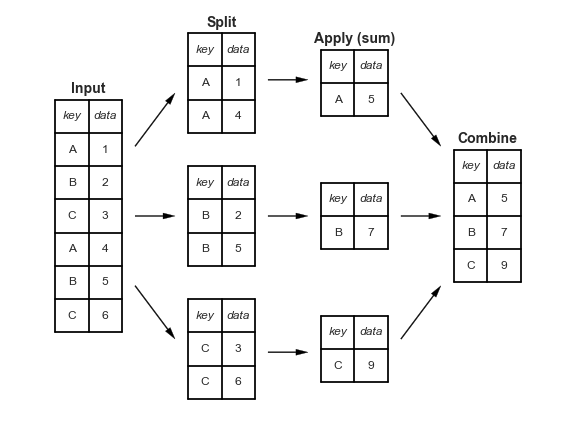

Again, people coming from `R` will find this pretty familiar, and it is. This is a Hadley Wickham idea. Let's get some station data using what we learn above. Since you are intermediate programers, is time to get things a little bit more complex ;) 

In [ ]:
year = 2020
station_code = '72530094846'

base_url = 'https://www.ncei.noaa.gov/data/global-hourly/access' 
url_station = f"{base_url}/{str(year)}/{station_code}.csv"

chicago_ohare = pd.read_csv(url_station)
chicago_ohare.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,35,37,41,42,43,44,45,46,47,48,49,50,52,53,54,55,57,58,59,60,61,75,76,77,78,79,80,81,82,83,84,87,89,90,91,93,94,100,101,102,103) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,WND,CIG,VIS,TMP,DEW,SLP,AA1,AA2,AA3,AB1,AD1,AE1,AH1,AH2,AH3,AH4,AH5,AH6,AI1,AI2,AI3,AI4,AI5,AI6,AJ1,AK1,AL1,AM1,AN1,AT1,...,GD2,GD3,GD4,GE1,GF1,KA1,KA2,KA3,KA4,KB1,KB2,KB3,KC1,KC2,KD1,KD2,KE1,KG1,KG2,MA1,MD1,MF1,MG1,MH1,MK1,MV1,MW1,MW2,MW3,OC1,OD1,OE1,OE2,OE3,RH1,RH2,RH3,WA1,REM,EQD
0,72530094846,2020-01-01T00:00:00,4,41.96019,-87.93162,201.8,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",FM-12,99999,V020,"260,1,N,0062,1","99999,9,9,N","016000,1,9,9","-0022,1","-0061,1","10098,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0003,3,1,000300,9,9",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"9,MSL ,+99999,+99999","08,99,1,99,9,99,9,00800,1,99,9,99,9","120,M,-0022,1","120,N,-0044,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"99999,9,09850,1","1,1,011,1,+999,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4,99,0108,1,999",NaN,NaN,NaN,NaN,NaN,NaN,NaN,SYN09272530 32566 82612 11022 21061 39850 4009...,NaN
1,72530094846,2020-01-01T00:51:00,7,41.96019,-87.93162,201.8,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",FM-15,KORD,V030,"260,5,N,0067,5","00610,5,M,N","016093,5,N,5","-0022,5","-0061,5","10100,5","01,0000,9,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"4,99,1,+07620,5,9",NaN,NaN,"9,MSL ,+99999,+99999","99,99,9,99,9,99,9,00610,1,99,9,99,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10091,5,09848,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0113,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET11112/31/19 18:51:03 METAR KORD 010051Z 260...,NaN
2,72530094846,2020-01-01T01:51:00,7,41.96019,-87.93162,201.8,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",FM-15,KORD,V030,"260,5,N,0067,5","00549,5,M,N","016093,5,N,5","-0022,5","-0061,5","10102,5","01,0000,9,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"9,MSL ,+99999,+99999","99,99,9,99,9,99,9,00549,1,99,9,99,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10095,5,09852,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0108,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET10412/31/19 19:51:03 METAR KORD 010151Z 260...,NaN
3,72530094846,2020-01-01T02:05:00,7,41.96019,-87.93162,201.8,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",FM-16,KORD,V030,"260,5,N,0046,5","22000,5,9,N","016093,5,N,5","-0028,5","-0061,5","99999,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"9,AGL ,+99999,+99999","04,99,5,99,9,99,9,00549,1,99,9,99,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10095,5,09852,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0103,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET09712/31/19 20:05:03 SPECI KORD 010205Z 260...,D01 0ADE726
4,72530094846,2020-01-01T02:51:00,7,41.96019,-87.93162,201.8,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",FM-15,KORD,V030,"250,5,N,0051,5","22000,5,9,N","016093,5,N,5","-0028,5","-0061,5","10101,5","01,0000,9,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"9,AGL ,+99999,+99999","04,99,5,99,9,99,9,00518,1,99,9,99,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10091,5,09848,5","0,9,003,9,+999,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET10712/31/19 20:51:03 METAR KORD 010251Z 250...,D01 0ADE726


We can change columns in a more programatic way instead of using `rename`. This is useful when you have a lot of columns, as this case. 

In [ ]:
chicago_ohare.columns = [str(col).lower() for col in chicago_ohare.columns.tolist()]
chicago_ohare.head()

,station,date,source,latitude,longitude,elevation,name,report_type,call_sign,quality_control,wnd,cig,vis,tmp,dew,slp,aa1,aa2,aa3,ab1,ad1,ae1,ah1,ah2,ah3,ah4,ah5,ah6,ai1,ai2,ai3,ai4,ai5,ai6,aj1,ak1,al1,am1,an1,at1,...,gd2,gd3,gd4,ge1,gf1,ka1,ka2,ka3,ka4,kb1,kb2,kb3,kc1,kc2,kd1,kd2,ke1,kg1,kg2,ma1,md1,mf1,mg1,mh1,mk1,mv1,mw1,mw2,mw3,oc1,od1,oe1,oe2,oe3,rh1,rh2,rh3,wa1,rem,eqd
0,72530094846,2020-01-01T00:00:00,4,41.96019,-87.93162,201.8,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",FM-12,99999,V020,"260,1,N,0062,1","99999,9,9,N","016000,1,9,9","-0022,1","-0061,1","10098,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0003,3,1,000300,9,9",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"9,MSL ,+99999,+99999","08,99,1,99,9,99,9,00800,1,99,9,99,9","120,M,-0022,1","120,N,-0044,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"99999,9,09850,1","1,1,011,1,+999,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4,99,0108,1,999",NaN,NaN,NaN,NaN,NaN,NaN,NaN,SYN09272530 32566 82612 11022 21061 39850 4009...,NaN
1,72530094846,2020-01-01T00:51:00,7,41.96019,-87.93162,201.8,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",FM-15,KORD,V030,"260,5,N,0067,5","00610,5,M,N","016093,5,N,5","-0022,5","-0061,5","10100,5","01,0000,9,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"4,99,1,+07620,5,9",NaN,NaN,"9,MSL ,+99999,+99999","99,99,9,99,9,99,9,00610,1,99,9,99,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10091,5,09848,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0113,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET11112/31/19 18:51:03 METAR KORD 010051Z 260...,NaN
2,72530094846,2020-01-01T01:51:00,7,41.96019,-87.93162,201.8,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",FM-15,KORD,V030,"260,5,N,0067,5","00549,5,M,N","016093,5,N,5","-0022,5","-0061,5","10102,5","01,0000,9,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"9,MSL ,+99999,+99999","99,99,9,99,9,99,9,00549,1,99,9,99,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10095,5,09852,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0108,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET10412/31/19 19:51:03 METAR KORD 010151Z 260...,NaN
3,72530094846,2020-01-01T02:05:00,7,41.96019,-87.93162,201.8,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",FM-16,KORD,V030,"260,5,N,0046,5","22000,5,9,N","016093,5,N,5","-0028,5","-0061,5","99999,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"9,AGL ,+99999,+99999","04,99,5,99,9,99,9,00549,1,99,9,99,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10095,5,09852,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0103,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET09712/31/19 20:05:03 SPECI KORD 010205Z 260...,D01 0ADE726
4,72530094846,2020-01-01T02:51:00,7,41.96019,-87.93162,201.8,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",FM-15,KORD,V030,"250,5,N,0051,5","22000,5,9,N","016093,5,N,5","-0028,5","-0061,5","10101,5","01,0000,9,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"9,AGL ,+99999,+99999","04,99,5,99,9,99,9,00518,1,99,9,99,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10091,5,09848,5","0,9,003,9,+999,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET10712/31/19 20:51:03 METAR KORD 010251Z 250...,D01 0ADE726


### 3.1 Data filtering (review)

In [ ]:
chicago_ohare = chicago_ohare[chicago_ohare.report_type == 'FM-15']

In [ ]:
chicago_ohare = chicago_ohare.filter(['station', 'date', 'name', 'tmp'])
chicago_ohare.head()

,station,date,name,tmp
1,72530094846,2020-01-01T00:51:00,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US","-0022,5"
2,72530094846,2020-01-01T01:51:00,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US","-0022,5"
4,72530094846,2020-01-01T02:51:00,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US","-0028,5"
5,72530094846,2020-01-01T03:51:00,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US","-0033,5"
6,72530094846,2020-01-01T04:51:00,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US","-0033,5"


### 3.2. Data cleaning: Several data fields in column

This aren't always what you expect!

All seems good, but `tmp` seems weird. Reading the documentation we see that `tmp` has data, but also a quality assurance value that is appened to the data. On top of that, the temperature is also in a 100-scale, so we need to divide it by 100

In [ ]:
chicago_ohare['tmp'].apply(lambda x: float(str(x).split(',')[0])/10)

0        -2.2
1        -2.2
2        -2.2
3        -2.8
4        -2.8
        ...  
8512     27.8
8513     26.1
8514    999.9
8515     25.0
8516     23.9
Name: tmp, Length: 8517, dtype: float64

#### Life lesson [# 1]: always check your data types 

Timestamps also seem to be weird, we can use our `datatime (dt)` methods to deal with this timestamps. Here, we can normalize the timestamp to the closest hour.

In [ ]:
chicago_ohare['date'].dt.floor('1H')

AttributeError: ignored

What happened here? Any ideas? 

In [ ]:
chicago_ohare.dtypes

In [ ]:
pd.to_datetime(chicago_ohare['date']).dt.floor('1H')

0      2020-01-01 00:00:00
1      2020-01-01 00:00:00
2      2020-01-01 01:00:00
3      2020-01-01 02:00:00
4      2020-01-01 02:00:00
               ...        
8512   2020-08-29 04:00:00
8513   2020-08-29 05:00:00
8514   2020-08-29 05:00:00
8515   2020-08-29 06:00:00
8516   2020-08-29 07:00:00
Name: date, Length: 8517, dtype: datetime64[ns]

In [ ]:
pd.to_datetime(chicago_ohare['date']).dt.round('60min')

1      2020-01-01 01:00:00
2      2020-01-01 02:00:00
4      2020-01-01 03:00:00
5      2020-01-01 04:00:00
6      2020-01-01 05:00:00
               ...        
8511   2020-08-29 04:00:00
8512   2020-08-29 05:00:00
8513   2020-08-29 06:00:00
8515   2020-08-29 07:00:00
8516   2020-08-29 08:00:00
Name: date, Length: 5792, dtype: datetime64[ns]

**AMAZING**

#### Life Lesson [# 2] - How to clean data efficiently

Standarize your data cleaning processes, this is helpful for several reasons:
 - Apply same cleaning to similar `DataFrames`
 - Split big big `DataFrames` and clean them all in parallel! 


In [ ]:
from urllib.parse import urljoin

def clean_noaa_station_df(df,
                         time_period=None):
    """Clean station year reports coming from NOAA-ISD

    Parameters:
     - df pd.DataFrame object with raw data
     - time_period list with strings of dates to filter the raw data

    Return:
    pd.DataFrame
    """

    df.columns = [str(col).lower() for col in df.columns.tolist()]
    keep_columns = ['tmp', 'station', 'date', 'name']
    report_type = 'FM-15'

    try:
        df['date'] = pd.to_datetime(df['date']).dt.round('60min')
        df = df[df.report_type == report_type]
        df.set_index('date', inplace=True)

        if time_period is not None:
            df_filter = df.loc[time_period[0]:time_period[1]]
        else:
            df_filter = df

        df_filter = df_filter.filter(keep_columns)
        df_filter['tmp'] = df_filter['tmp'].apply(
            lambda x: float(str(x).split(',')[0])/10
        )

        df_filter = df_filter[df_filter['tmp'] != 999.9]
        df_filter.reset_index(inplace=True,
                            drop=False)
        
        df_filter = df_filter.drop_duplicates(["date", "station"])

    except Exception as e:
        print(f'Error during cleaning: {e}')

    return df_filter

'''
Run our function for a list of functions:

 - Notice the use of list comprehensions to facilitate the process and
   avoid looping -- is usually hard to read.
'''

year = 2020
station_codes = ['72530094846', '72534014819']
base_url = 'https://www.ncei.noaa.gov/data/global-hourly/access' 

raw_data = [pd.read_csv(f"{base_url}/{str(year)}/{station_code}.csv",
                        dtype='str') 
           for station_code in station_codes]

clean_data = [clean_noaa_station_df(data) for data in raw_data]

chicago_weather = pd.concat(clean_data)
chicago_weather

,date,tmp,station,name
0,2020-01-01 01:00:00,-2.2,72530094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US"
1,2020-01-01 02:00:00,-2.2,72530094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US"
2,2020-01-01 03:00:00,-2.8,72530094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US"
3,2020-01-01 04:00:00,-3.3,72530094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US"
4,2020-01-01 05:00:00,-3.3,72530094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US"
...,...,...,...,...
5809,2020-08-30 04:00:00,21.7,72534014819,"CHICAGO MIDWAY AIRPORT, IL US"
5810,2020-08-30 05:00:00,21.1,72534014819,"CHICAGO MIDWAY AIRPORT, IL US"
5811,2020-08-30 06:00:00,20.0,72534014819,"CHICAGO MIDWAY AIRPORT, IL US"
5812,2020-08-30 07:00:00,21.7,72534014819,"CHICAGO MIDWAY AIRPORT, IL US"


### 3.3 Let's `groupby`

When grouping by we are dividing our data by one or several variables and then applying a function to it. Most of the times, we are aggregating data and we have a set of predefined functions to apply to each of our groups (i.e. `mean()`, `min()`, `max()`, `last()`, `first()` etc.)

For instance, we can calculate the `mean` temperature for our two stations in the city. 

In [ ]:
chicago_weather.groupby('station').tmp.mean()

station
72530094846    12.721506
72534014819    12.733351
Name: tmp, dtype: float64

#### Check-in [# 4]

You can run several aggregation functions (we will see that later). `Pandas` has a trick under the sleeve for this. Try the follwing: 

```
chicago_weather.groupby('station').describe()
```

What happens?

In [ ]:
"""
Use this code cell to answer the question.
Literally, just copy and paste ;)
"""

`describe()` is cool, but you don't have much control over the operations or their order. You can use `agg` to pass several operations. Notice that you can use `pandas` methods by passing a string function, or you can use other predefined functions (like `np.median`)

In [ ]:
chicago_weather.groupby('station').tmp.agg(mean='mean',
                                           median=np.median,
                                           min='min',
                                           max='max')

,mean,median,min,max
station,,,,
72530094846,12.769001,12.2,-18.9,36.1
72534014819,12.781115,12.8,-18.3,35.0


#### Check-in [# 5]

What's the standard deviation and variance of temperature for both station across the year?

In [ ]:
"""
Use this code cell to code to answer the question above.
"""

Below the hood `groupby` is creating an iterator of dataframes splitted by the grouping key. We can use this object in a loop and make calculations:

In [ ]:
for g, df in chicago_weather.groupby(['station']):
    print(f'Group {g} has shape: {df.shape}')

Group 72530094846 has shape: (5813, 5)
Group 72534014819 has shape: (5814, 5)


### 3.4 Let's `groupby` using time

You can also apply more complex operations and group by using time. `pandas` is powerful enough to use the `date` columnn to calculate different grouping windows. We have two options when using time: `resample` and `Grouper`. 

In [ ]:
chicago_weather['tmp_demean'] = chicago_weather.groupby('station').tmp.transform(lambda x: x - x.mean())
chicago_weather.head()

,date,tmp,station,name,tmp_demean
0,2020-01-01 01:00:00,-2.2,72530094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",-14.921506
1,2020-01-01 02:00:00,-2.2,72530094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",-14.921506
2,2020-01-01 03:00:00,-2.8,72530094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",-15.521506
3,2020-01-01 04:00:00,-3.3,72530094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",-16.021506
4,2020-01-01 05:00:00,-3.3,72530094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",-16.021506


In [ ]:
chicago_weather.set_index('date').resample('M').tmp.mean()

date
2020-01-31    -0.418704
2020-02-29    -0.946356
2020-03-31     5.493497
2020-04-30     8.670984
2020-05-31    15.403135
2020-06-30    23.160105
2020-07-31    26.030681
2020-08-31    24.779844
Freq: M, Name: tmp, dtype: float64

`resample` relies on the `Index` of the `DataFrame` to calculate aggregations. This is why we first use `set_index` to tell pandas to index our data by `date`. Sometimes we don't want to index our data, so `Grouper` has our backs.

In [ ]:
chicago_weather.groupby(pd.Grouper(key='date', freq='M')).tmp.quantile()

date
2020-01-31     0.0
2020-02-29    -0.6
2020-03-31     5.0
2020-04-30     7.8
2020-05-31    15.0
2020-06-30    23.3
2020-07-31    26.1
2020-08-31    24.4
Freq: M, Name: tmp, dtype: float64

#### Check-in [# 6]

There are some advantages of using `Grouper` over `resample`, and viceversa. Try to calculate the `max` monthly temperature for each station. 

_Hint: you can pass a list to `groupby`_

In [ ]:
"""
Use this code block to answer the question
"""

### 3.5 Advanced `groupby`

Sometimes we want to execute more complex functions in time where the aggregation might change. A good example of this are the rolling windows where the group changes with time.

In [ ]:
chicago_weather.groupby(['station'])['tmp'].rolling(10, win_type='boxcar', min_periods=1).mean()

station          
72530094846  0       -2.200
             1       -2.200
             2       -2.400
             3       -2.625
             4       -2.760
                      ...  
72534014819  5809    25.720
             5810    25.050
             5811    24.220
             5812    23.560
             5813    22.890
Name: tmp, Length: 11627, dtype: float64

In [ ]:
chicago_weather['rolling'] = chicago_weather.groupby(['station'])['tmp'].\
rolling(5, win_type='boxcar', center=True).\
mean().reset_index(drop=True)
chicago_weather.head(10)

,date,tmp,station,name,rolling
0,2020-01-01 01:00:00,-2.2,72530094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",NaN
1,2020-01-01 02:00:00,-2.2,72530094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",NaN
2,2020-01-01 03:00:00,-2.8,72530094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",-2.76
3,2020-01-01 04:00:00,-3.3,72530094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",-3.10
4,2020-01-01 05:00:00,-3.3,72530094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",-3.54
5,2020-01-01 06:00:00,-3.9,72530094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",-3.98
6,2020-01-01 07:00:00,-4.4,72530094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",-4.44
7,2020-01-01 08:00:00,-5.0,72530094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",-5.00
8,2020-01-01 09:00:00,-5.6,72530094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",-5.44
9,2020-01-01 10:00:00,-6.1,72530094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",-5.78


### 3.6 Transform data 

When we aggregate data we are usually reducing its dimensions. Like in the examples above, we went from serveral hundreds of rows to only two, one per group. But we can also use group by operations to create new columns. We have seen this before when we calculate anomalies in our data in the Section I. 

In [ ]:
chicago_weather.groupby('station').tmp.transform(lambda x: x - x.mean())

0      -14.921506
1      -14.921506
2      -15.521506
3      -16.021506
4      -16.021506
          ...    
5785    14.466649
5786    15.066649
5787    13.966649
5788    12.866649
5789    11.666649
Name: tmp, Length: 11579, dtype: float64

## Section 4: Data and its shapes

Sometimes can come on different formats. We talk about wide data when we have observations in columns (think of it as _un-tidy_ data). Some times data is stored in wide formats to save disk-space (i.e. long time-series data for different entities, etc.) 

Wide data looks like this: 

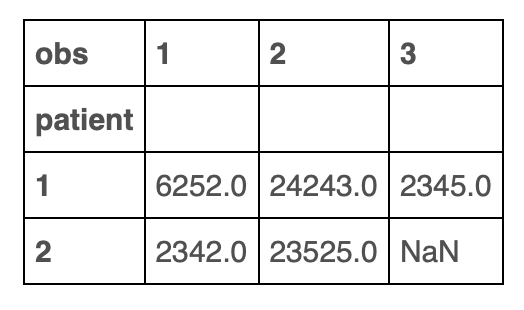

Long data is similar to _tidy_ data in the sense that each observation will be in a row and characteristics of these observations will be organized in columns. It looks like this: 

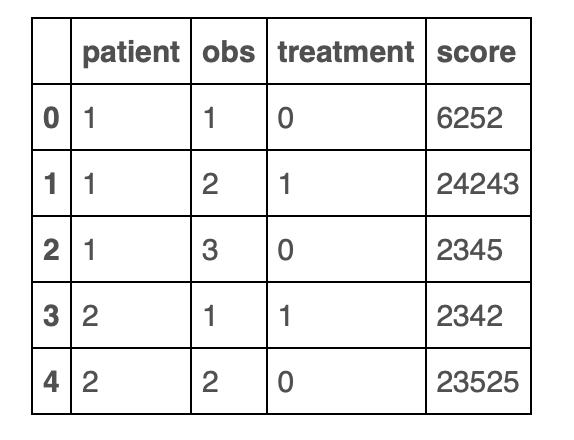

In `pandas` there's different ways of taking data from one shape to another one. Here we will explore some of this options and discuss its advantages and disadvantages. 


### 4.1. Long to wide

Well, `chicago_weather` is embarassangly long

In [ ]:
chicago_weather

,date,tmp,station,name,tmp_demean
0,2020-01-01 01:00:00,-2.2,72530094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",-14.921506
1,2020-01-01 02:00:00,-2.2,72530094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",-14.921506
2,2020-01-01 03:00:00,-2.8,72530094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",-15.521506
3,2020-01-01 04:00:00,-3.3,72530094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",-16.021506
4,2020-01-01 05:00:00,-3.3,72530094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",-16.021506
...,...,...,...,...,...
5785,2020-08-29 04:00:00,27.2,72534014819,"CHICAGO MIDWAY AIRPORT, IL US",14.466649
5786,2020-08-29 05:00:00,27.8,72534014819,"CHICAGO MIDWAY AIRPORT, IL US",15.066649
5787,2020-08-29 06:00:00,26.7,72534014819,"CHICAGO MIDWAY AIRPORT, IL US",13.966649
5788,2020-08-29 07:00:00,25.6,72534014819,"CHICAGO MIDWAY AIRPORT, IL US",12.866649


But you can transform it to wide. Most of the times this tranformations are needed when you want to plot or make different calculations. The most useful transformation, at least for me is the ability of storing big data files taking less space on disk. 

In [ ]:
chicago_weather[['station', 'date', 'tmp']].pivot(index='station', columns='date', values='tmp')

date,2020-01-01 01:00:00,2020-01-01 02:00:00,2020-01-01 03:00:00,2020-01-01 04:00:00,2020-01-01 05:00:00,2020-01-01 06:00:00,2020-01-01 07:00:00,2020-01-01 08:00:00,2020-01-01 09:00:00,2020-01-01 10:00:00,2020-01-01 11:00:00,2020-01-01 12:00:00,2020-01-01 13:00:00,2020-01-01 14:00:00,2020-01-01 15:00:00,2020-01-01 16:00:00,2020-01-01 17:00:00,2020-01-01 18:00:00,2020-01-01 19:00:00,2020-01-01 20:00:00,2020-01-01 21:00:00,2020-01-01 22:00:00,2020-01-01 23:00:00,2020-01-02 00:00:00,2020-01-02 01:00:00,2020-01-02 02:00:00,2020-01-02 03:00:00,2020-01-02 04:00:00,2020-01-02 05:00:00,2020-01-02 06:00:00,2020-01-02 07:00:00,2020-01-02 08:00:00,2020-01-02 09:00:00,2020-01-02 10:00:00,2020-01-02 11:00:00,2020-01-02 12:00:00,2020-01-02 13:00:00,2020-01-02 14:00:00,2020-01-02 15:00:00,2020-01-02 16:00:00,...,2020-08-27 17:00:00,2020-08-27 18:00:00,2020-08-27 19:00:00,2020-08-27 20:00:00,2020-08-27 21:00:00,2020-08-27 22:00:00,2020-08-27 23:00:00,2020-08-28 00:00:00,2020-08-28 01:00:00,2020-08-28 02:00:00,2020-08-28 03:00:00,2020-08-28 04:00:00,2020-08-28 05:00:00,2020-08-28 06:00:00,2020-08-28 07:00:00,2020-08-28 08:00:00,2020-08-28 09:00:00,2020-08-28 10:00:00,2020-08-28 11:00:00,2020-08-28 12:00:00,2020-08-28 13:00:00,2020-08-28 14:00:00,2020-08-28 15:00:00,2020-08-28 16:00:00,2020-08-28 17:00:00,2020-08-28 18:00:00,2020-08-28 19:00:00,2020-08-28 20:00:00,2020-08-28 21:00:00,2020-08-28 22:00:00,2020-08-28 23:00:00,2020-08-29 00:00:00,2020-08-29 01:00:00,2020-08-29 02:00:00,2020-08-29 03:00:00,2020-08-29 04:00:00,2020-08-29 05:00:00,2020-08-29 06:00:00,2020-08-29 07:00:00,2020-08-29 08:00:00
station,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
72530094846,-2.2,-2.2,-2.8,-3.3,-3.3,-3.9,-4.4,-5.0,-5.6,-6.1,-6.1,-6.1,-6.1,-6.1,-4.4,-2.2,-0.6,1.7,3.3,4.4,5.0,5.0,4.4,4.4,4.4,5.0,5.6,5.6,5.0,5.6,4.4,4.4,3.9,3.9,3.3,3.3,2.8,2.8,3.9,5.0,...,32.8,33.3,34.4,33.9,34.4,33.3,33.9,32.8,31.7,30.6,29.4,28.9,27.8,27.2,27.2,26.7,25.6,25.6,25.6,25.0,26.1,27.8,29.4,31.1,31.7,33.3,33.3,33.3,34.4,34.4,33.9,32.2,31.1,31.1,30.0,29.4,27.8,26.1,25.0,23.9
72534014819,-1.7,-1.7,-1.7,-1.7,-1.7,-2.8,-2.8,-3.3,-4.4,-4.4,-5.0,-5.0,-5.0,-5.0,-3.3,-1.1,0.6,2.2,3.3,4.4,5.6,5.6,5.0,5.0,5.6,5.6,6.1,5.6,5.0,5.0,4.4,3.9,3.9,3.3,3.3,3.3,3.3,2.8,3.9,6.1,...,32.2,33.9,32.2,34.4,33.9,34.4,33.3,32.2,30.6,29.4,28.9,27.8,27.2,26.7,26.1,26.1,25.6,25.0,24.4,24.4,25.6,27.2,29.4,31.1,31.7,33.3,33.9,33.9,33.9,34.4,32.8,31.1,31.1,30.0,29.4,27.2,27.8,26.7,25.6,24.4


You can also transform to wide in different directions! This one is useful for plotting, as we will see later. 

In [ ]:
chicago_weather_wide = chicago_weather[['station', 'date', 'tmp']].pivot(index='date', columns='station', values='tmp')
chicago_weather_wide

station,72530094846,72534014819
date,,
2020-01-01 01:00:00,-2.2,-1.7
2020-01-01 02:00:00,-2.2,-1.7
2020-01-01 03:00:00,-2.8,-1.7
2020-01-01 04:00:00,-3.3,-1.7
2020-01-01 05:00:00,-3.3,-1.7
...,...,...
2020-08-29 04:00:00,29.4,27.2
2020-08-29 05:00:00,27.8,27.8
2020-08-29 06:00:00,26.1,26.7


### 4.2 Long to wide format

Let's use our `chicago_weather_wide` data and put it back to the long format. Remember the data is "wider", so has observations on both rows and columns. 

In [ ]:
chicago_weather_wide.reset_index().melt(id_vars=['date'])

,date,station,value
0,2020-01-01 01:00:00,72530094846,-2.2
1,2020-01-01 02:00:00,72530094846,-2.2
2,2020-01-01 03:00:00,72530094846,-2.8
3,2020-01-01 04:00:00,72530094846,-3.3
4,2020-01-01 05:00:00,72530094846,-3.3
...,...,...,...
11579,2020-08-29 04:00:00,72534014819,27.2
11580,2020-08-29 05:00:00,72534014819,27.8
11581,2020-08-29 06:00:00,72534014819,26.7
11582,2020-08-29 07:00:00,72534014819,25.6


### 4.3 Merge data
 
Sometimes we have different data sources of related data. In our base case we have a dataframe of stations with station metadata and another dataframe with actual temperature data. We can combine data frames using common keys by `merging` data frames. 

There are two ways of combining datasets: 
 - Along columns: `merge()`
 - Along rows: `pd.concat()`

In [ ]:
chicago_weather_metadata = chicago_weather.merge(stations_il,
                                                 left_on=['station'],
                                                 right_on=['station_code'])
chicago_weather_metadata.head()

,date,tmp,station,name,rolling,start_date_service,station_code,usaf,wban,station_name,country,state,icao_code,lat,lon,elevation,end_date_service,age
0,2020-01-01 01:00:00,-2.2,72530094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",NaN,1946-10-01,72530094846,725300,94846,CHICAGO O'HARE INTERNATIONAL AIRPORT,US,IL,KORD,+41.960,-087.932,+0201.8,2020-08-30,73.915275
1,2020-01-01 02:00:00,-2.2,72530094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",NaN,1946-10-01,72530094846,725300,94846,CHICAGO O'HARE INTERNATIONAL AIRPORT,US,IL,KORD,+41.960,-087.932,+0201.8,2020-08-30,73.915275
2,2020-01-01 03:00:00,-2.8,72530094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",-2.76,1946-10-01,72530094846,725300,94846,CHICAGO O'HARE INTERNATIONAL AIRPORT,US,IL,KORD,+41.960,-087.932,+0201.8,2020-08-30,73.915275
3,2020-01-01 04:00:00,-3.3,72530094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",-3.10,1946-10-01,72530094846,725300,94846,CHICAGO O'HARE INTERNATIONAL AIRPORT,US,IL,KORD,+41.960,-087.932,+0201.8,2020-08-30,73.915275
4,2020-01-01 05:00:00,-3.3,72530094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",-3.54,1946-10-01,72530094846,725300,94846,CHICAGO O'HARE INTERNATIONAL AIRPORT,US,IL,KORD,+41.960,-087.932,+0201.8,2020-08-30,73.915275


In [ ]:
chicago_weather.groupby('station').last()

,date,tmp,name,rolling
station,,,,
72530094846,2020-08-30 08:00:00,20.6,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",-1.70
72534014819,2020-08-30 08:00:00,21.1,"CHICAGO MIDWAY AIRPORT, IL US",20.34


### Check-in [# 7]

1. Get the last temeprature data for the two stations 
2. Merge the last hour data with the metadata `DataFrame`

_HINT_: Remember `last()`.

In [ ]:
"""
Use this code chunk to work on this
"""

## Section 5: Visualization

`Pandas` has extremely powerful plotting abilities off-the-shelf. Tey work pretty well if the data is formatted in the right direction. We will concentrate here on `pandas` + `matplotlib`, but we will cover viusualization extensively in the following days, particularly with other more friendly libraries, like `seaborn`

### 5.1 Time series plots

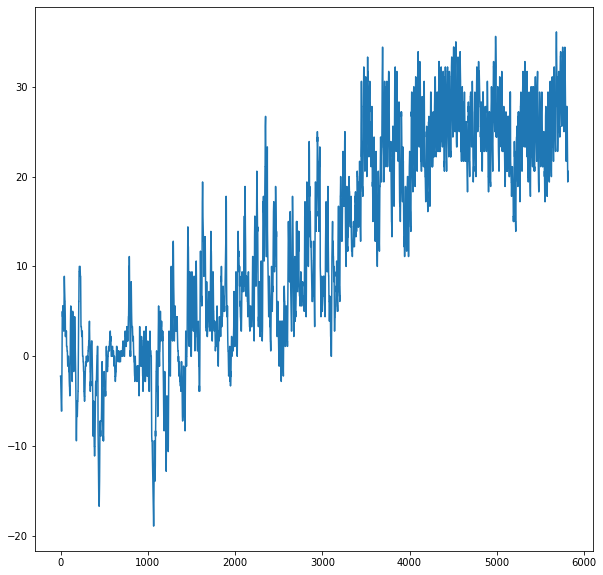

In [ ]:
ohare_station = chicago_weather[chicago_weather.station == '72530094846']
fig, ax = plt.subplots(figsize=(10, 10))
ohare_station.tmp.plot(ax=ax)

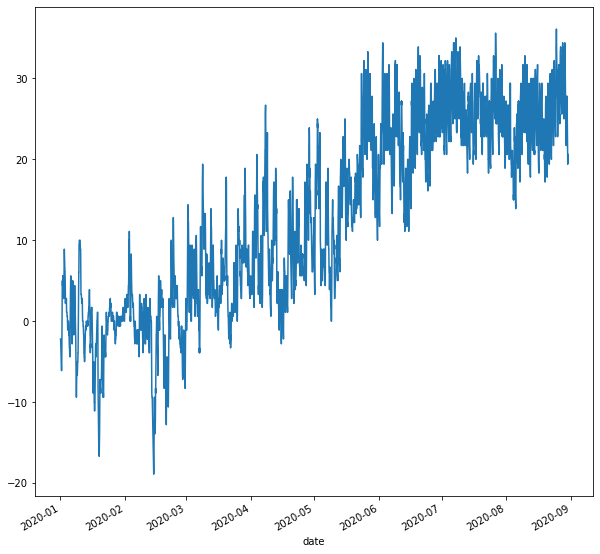

In [ ]:
ohare_station.set_index('date', inplace=True)
fig, ax = plt.subplots(figsize=(10, 10))
ohare_station.tmp.plot(ax=ax)

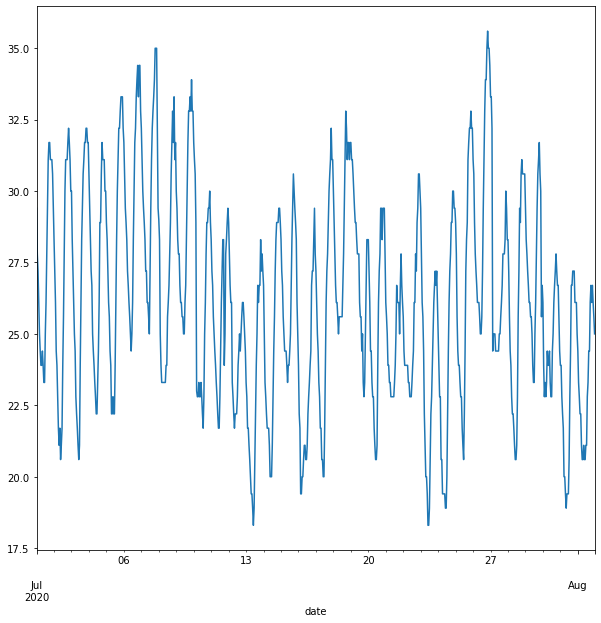

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ohare_station['2020-07-01':'2020-08-01'].tmp.plot(ax=ax)

We can also have overlapping time series, and here's wheere wide data is useful (sharing the same index with time!)

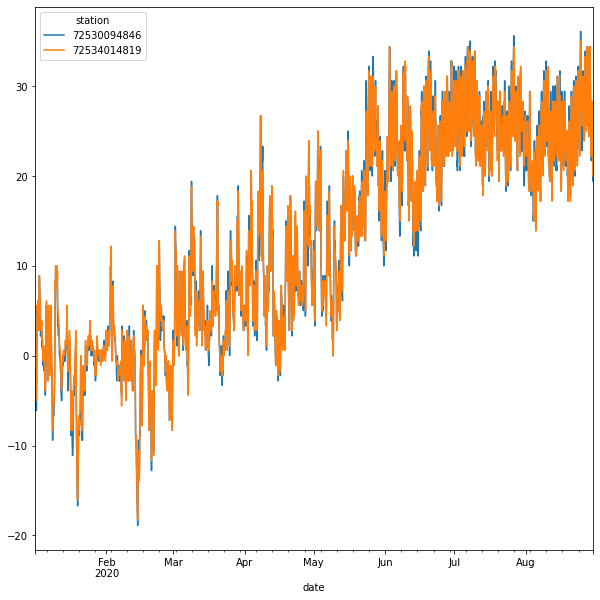

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
chicago_weather[['station', 'date', 'tmp']].pivot(index='date', columns='station', values='tmp').plot(ax=ax)

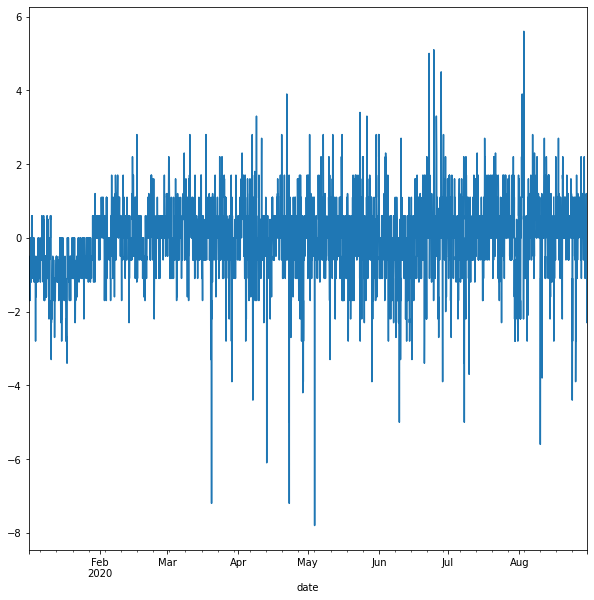

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
chicago_wide = chicago_weather[['station', 'date', 'tmp']].pivot(index='date', columns='station', values='tmp')
(chicago_wide.iloc[:,0] - chicago_wide.iloc[:, 1]).plot(ax=ax)

### 5.2 Bars and categorical values

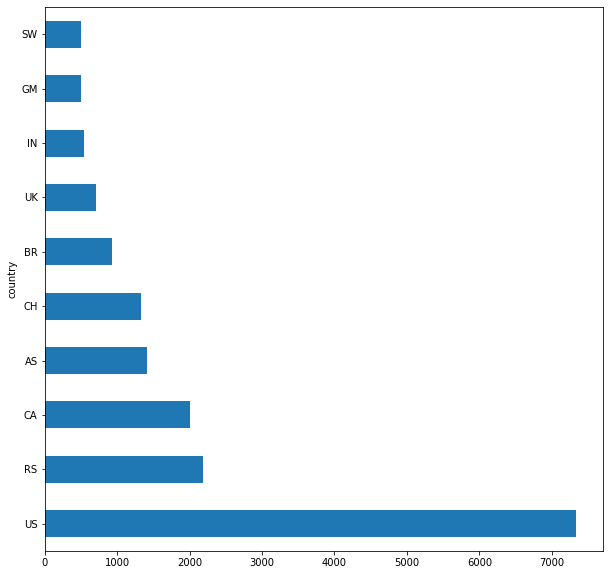

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
station_inventory.groupby('country').station_code.nunique().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax)